In [79]:
# 导入项目中所需的模块包
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# 数据概览

In [80]:
df = pd.read_csv("ratings_Electronics.csv", names=['userID', 'productID', 'Rating', 'timestamp'])
df.head()

,userID,productID,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [81]:
# 查看数据类型
print('数据类型：')
print(df.dtypes,'\n')
print('数据大致信息：')
print(df.info())

数据类型：
userID        object
productID     object
Rating       float64
timestamp      int64
dtype: object 

数据大致信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userID     object 
 1   productID  object 
 2   Rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB
None


**查看平均值、最大值、最小值、标准差以及评分的四分位数**

In [82]:
df.describe()

,Rating,timestamp
count,7.824482e+06,7.824482e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


**输出最低、最高评分**

In [83]:
print('最低评分：%d 分' %(df.Rating.min()))
print('最高评分：%d 分' %(df.Rating.max()))

最低评分：1 分
最高评分：5 分


**数据统计**

In [84]:
print('数据统计：\n')

print('用户总数：',len(np.unique(df.userID)))    # unique()函数保证数据唯一性 - 不重复
print('商品总数：',len(np.unique(df.productID)))
print('评分总数：',df.shape[0])

数据统计：

用户总数： 4201696
商品总数： 476002
评分总数： 7824482


# 数据预处理

**查看各字段的缺失情况**

In [85]:
print('各字段的缺失值数量情况',df.isnull().sum())

各字段的缺失值数量情况 userID       0
productID    0
Rating       0
timestamp    0
dtype: int64


**删除冗余数据**

In [86]:
# 删除时间戳
df.drop(['timestamp'],axis=1, inplace=True)
df.head()

,userID,productID,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


# 数据可视化

**用户评分数**

In [87]:
# 每个用户的评分数量，降序排序

user_rate_nums = df.groupby(by='userID')['Rating'].count().sort_values(ascending=False)
user_rate_nums.head()

userID
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: Rating, dtype: int64

In [88]:
user_rate_nums.describe()

count    4.201696e+06
mean     1.862220e+00
std      2.885110e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.200000e+02
Name: Rating, dtype: float64

In [89]:
print('评价次数大于50的人数：{}个\n'.format(sum(user_rate_nums>=50)))

评价次数大于50的人数：1540个



**筛选评分数量小于50的商品**

In [ ]:
# 筛选掉评分数量小于 50 人次的商品
new_df = df.groupby('productID').filter(lambda x:x['Rating'].count()>=50)

**商品平均分**

In [31]:
new_df.groupby('productID')['Rating'].mean().sort_values(ascending=False).head()

productID
B002E6R7NG    4.980392
B004I763AW    4.966667
B003J9QQWU    4.964286
B0043ZLFXE    4.955556
B000TMFYBO    4.953125
Name: Rating, dtype: float64

**商品评分数量**

In [192]:
product_rate_nums = new_df.groupby('productID')['Rating'].count().sort_values(ascending=False)
product_rate_nums

productID
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
              ...  
B002653KNQ       50
B001W81LZ2       50
B0001G6UES       50
B008NC8IB0       50
B0012Y6VQA       50
Name: Rating, Length: 26226, dtype: int64

### 商品评分数量分布

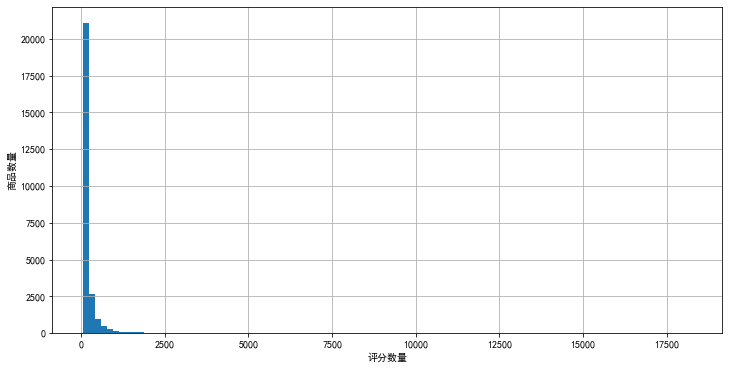

In [188]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）

plt.figure(figsize=(12,6))
pd.DataFrame(product_rate_nums)['Rating'].hist(bins=100)

plt.xlabel('评分数量')
plt.ylabel('商品数量')
plt.show()

In [33]:
# 平均分 与 评分数量
ratings_mean_count = pd.DataFrame(new_df.groupby('productID')['Rating'].mean().sort_values(ascending=False))
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('productID')['Rating'].count())
ratings_mean_count.head()

,Rating,rating_counts
productID,,
B002E6R7NG,4.980392,51
B004I763AW,4.966667,60
B003J9QQWU,4.964286,56
B0043ZLFXE,4.955556,90
B000TMFYBO,4.953125,64


### 各评分段的评分数量分布

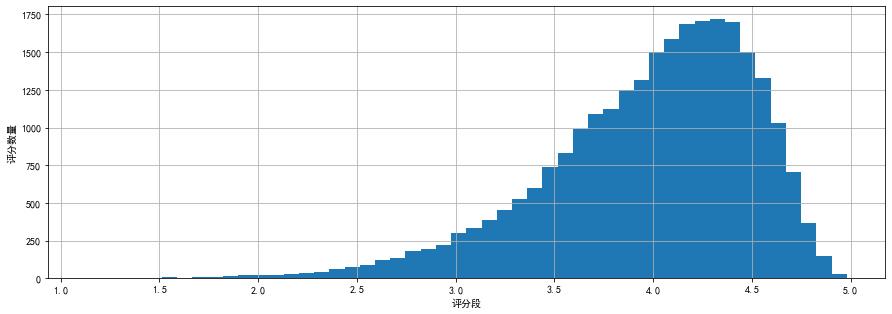

In [194]:
plt.figure(figsize=(15,5))
ratings_mean_count['Rating'].hist(bins=50)

plt.xlabel('评分段')
plt.ylabel('评分数量')
plt.show()

# 利用基于矩阵分解的协同过滤算法实现商品推荐系统
#### 创建商品和用户的关系矩阵

In [207]:
new_df1 = new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='Rating', index='userID', columns='productID', fill_value=0)
pd.DataFrame(ratings_matrix)    # 查看矩阵

productID,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JPPI,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
userID,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0266076X6KPZ6CCHGVS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0571176384K8RBNKGF8O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZXP46IB63PU8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZYTSU42BZ7TP,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZGJ2KMWB7R,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
X = ratings_matrix.T    # 矩阵转置
pd.DataFrame(X)         # 查看转置后的矩阵

userID,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A0821988FXKFYX53V4QG,A099626739FNCRNHIKBCG,...,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXKUK895VGSM,AZXP46IB63PU8,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZST8OYL5P4Q
productID,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501520,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1400532620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B00000JPPI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
B00000JSGF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000JYLO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 矩阵分解

In [212]:
# 构建 SVD 模型，将特征数目组合为 10 个重要特征
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)    # 对矩阵进行转化
pd.DataFrame(decomposed_matrix)

,0,1,2,3,4,5,6,7,8,9
0,1.481045e+02,-0.154590,0.024541,0.000232,-0.134173,0.000060,0.046063,0.000189,0.003388,-0.082649
1,7.054449e-04,1.289849,1.489464,0.222186,0.009115,0.015994,0.008029,0.235759,61.235779,1.815534
2,2.760374e-05,0.094096,0.319521,0.001771,-0.005904,0.001518,0.021480,0.021834,1.500308,-0.007319
3,4.332601e-04,0.739674,0.498069,-0.042176,-0.038568,-0.072157,0.000934,-0.072363,4.668088,-0.293209
4,6.571567e-04,0.816294,1.126883,0.098703,0.015099,0.036354,0.016767,0.549496,-1.735330,-1.503176
...,...,...,...,...,...,...,...,...,...,...
71,4.534932e-07,0.000010,0.000050,-0.000081,0.000046,0.001831,0.000015,-0.002360,0.003593,0.005312
72,1.949165e-05,-0.000066,0.004312,0.005262,0.319741,-0.001011,1.045026,0.082548,-0.377480,-0.589605
73,1.828851e-04,0.001097,0.000229,0.002014,0.002659,0.002250,0.004459,-0.014605,0.011987,-0.005030
74,-9.465753e-07,-0.000724,-0.002630,0.004770,-0.000218,-0.000434,0.007238,0.007082,0.002552,0.091202


**构建相关系数矩阵，计算商品间的相关系数**

In [213]:
correlation_matrix = np.corrcoef(decomposed_matrix)
pd.DataFrame(correlation_matrix)

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1.000000,-0.121111,-0.145392,-0.127415,0.022528,-0.087204,-0.128349,-0.189366,-0.152911,-0.072911,...,0.070114,0.100451,-0.110406,-0.076308,-0.161564,-0.135402,-0.039501,-0.017526,-0.134832,-0.212222
1,-0.121111,1.000000,0.980615,0.980804,-0.648963,-0.088806,-0.125116,0.783442,0.938983,0.223370,...,-0.883417,-0.984340,-0.120707,-0.116048,0.581656,0.459148,-0.368269,0.585871,-0.081858,0.771390
2,-0.145392,0.980615,1.000000,0.987112,-0.526887,-0.096531,0.067012,0.887942,0.896248,0.324292,...,-0.896136,-0.960599,-0.144180,-0.180426,0.506801,0.398582,-0.348303,0.589213,-0.155044,0.749116
3,-0.127415,0.980804,0.987112,1.000000,-0.511940,0.038953,-0.015337,0.835356,0.905974,0.354875,...,-0.914603,-0.951806,-0.144317,-0.220185,0.467666,0.368689,-0.325249,0.619310,-0.200345,0.727500
4,0.022528,-0.648963,-0.526887,-0.511940,1.000000,0.260009,0.524035,-0.196860,-0.782395,0.552460,...,0.341419,0.715378,0.035449,-0.533332,-0.865233,-0.830972,0.464889,-0.347484,-0.575604,-0.414542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.135402,0.459148,0.398582,0.368689,-0.830972,-0.113757,-0.156500,0.223736,0.674764,-0.676061,...,-0.145997,-0.536590,0.160856,0.692616,0.785062,1.000000,-0.598406,0.377777,0.687096,0.025907
72,-0.039501,-0.368269,-0.348303,-0.325249,0.464889,-0.030081,-0.038501,-0.314951,-0.521792,0.446285,...,0.004102,0.403634,-0.040907,-0.516738,-0.606007,-0.598406,1.000000,0.094741,-0.471866,-0.075106
73,-0.017526,0.585871,0.589213,0.619310,-0.347484,0.026019,-0.018628,0.438605,0.518766,0.223430,...,-0.762285,-0.530932,0.092060,-0.307113,0.007075,0.377777,0.094741,1.000000,-0.315693,0.116737
74,-0.134832,-0.081858,-0.155044,-0.200345,-0.575604,-0.112347,-0.190348,-0.230441,0.214087,-0.911645,...,0.496135,-0.060106,-0.139754,0.989489,0.739660,0.687096,-0.471866,-0.315693,1.000000,-0.134613


## 基于物品相似度实现推荐
**确定商品的唯一性**

In [218]:
i = X.index[20]    # 假设用户喜欢第 20 个商品
product_names = list(X.index)
product_ID = product_names.index(i)

**查看该商品在相似度矩阵中相似的商品**

In [232]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape[0]    # 相似商品数量

76

In [242]:
# 选出相关系数大于 0.8 的商品
Recommend = list(X.index[correlation_product_ID > 0.8])
Recommend.remove(i)    # 去除商品自身

# 将相关系数排名前 5 的商品推荐给喜欢该商品的用户
推荐商品 = pd.DataFrame(Recommend[0:5])
推荐商品.columns=['productID']
推荐商品

,productID
0,1400501466
1,1400501520
2,1400501776
3,1400599997
4,9625993428
